In [3]:
import dlib
import cv2
import matplotlib.pyplot as plt
import numpy as np

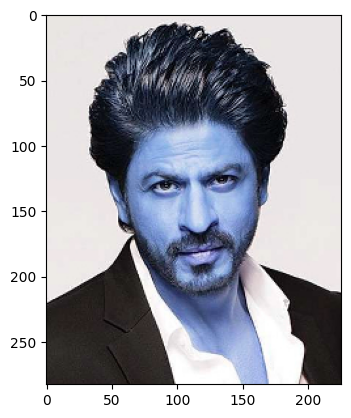

In [4]:
image = cv2.imread('DestinationImage.jpg')
plt.imshow(image)

In [5]:
face_detector = dlib.get_frontal_face_detector()
point_detector = dlib.shape_predictor('shape_predictor_68_face_landmarks.dat')

In [6]:
face_detection = face_detector(image, 1)

In [7]:
face_detection

rectangles[[(55, 104) (163, 211)]]

In [8]:
for face in face_detection:
    points = point_detector(image, face)
    for point in points.parts():
        cv2.circle(image, (point.x, point.y), 2, (255, 0, 0), 2)

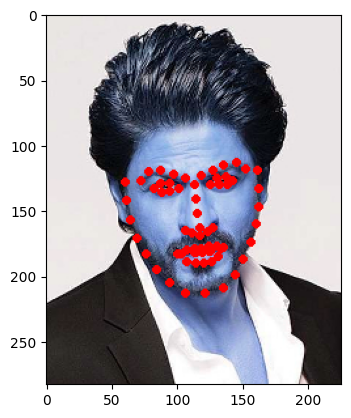

In [9]:
plt.imshow(image)

In [10]:
points_list = []

for n in range(0, 68):
    x = points.part(n).x
    y = points.part(n).y
    points_list += [(x,y)]

points = np.array(points_list, np.int32)

In [11]:
points.shape

(68, 2)

In [12]:
convexhull = cv2.convexHull(points=points)

In [13]:
convexhull.shape

(20, 1, 2)

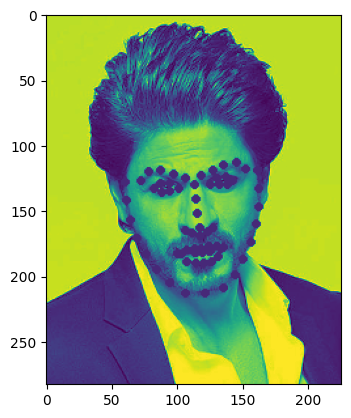

In [14]:
img_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
plt.imshow(img_gray)

In [15]:
image.shape

(283, 226, 3)

In [16]:
img_gray.shape

(283, 226)

In [17]:
mask = np.zeros_like(img_gray)

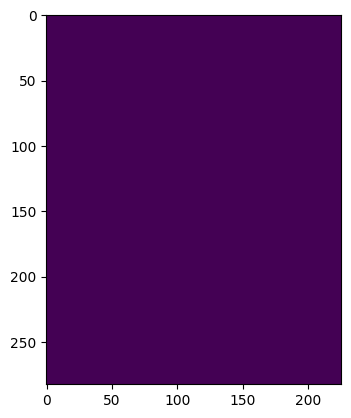

In [18]:
plt.imshow(mask)

In [19]:
cv2.fillConvexPoly(mask, convexhull, 255).shape

(283, 226)

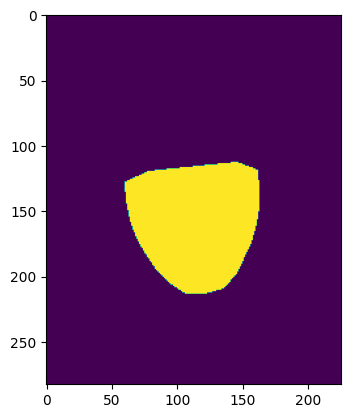

In [20]:
plt.imshow(mask)

In [21]:
source = cv2.imread("SourceImage.jpg")
source_grey = cv2.cvtColor(source, cv2.COLOR_BGR2GRAY)
mask = np.zeros_like(source_grey)
face_detector = dlib.get_frontal_face_detector()
points_detector = dlib.shape_predictor("shape_predictor_68_face_landmarks.dat")
source_faces = face_detector(source_grey)

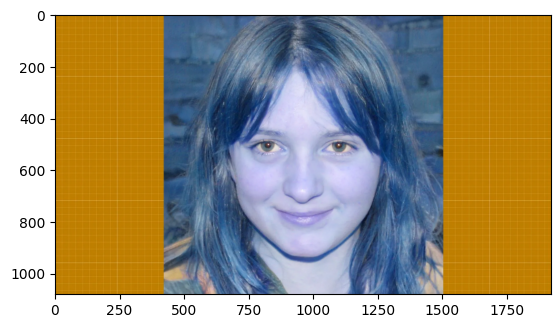

In [22]:
plt.imshow(source)

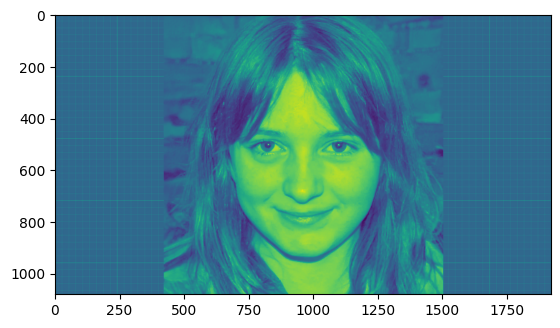

In [23]:
plt.imshow(source_grey)

In [24]:
source_faces

rectangles[[(701, 403) (1236, 938)]]

In [25]:
for face in source_faces:
    points = points_detector(source_grey, face)
    points_list = []
    for n in range(0, 68):
        x = points.part(n).x
        y = points.part(n).y
        points_list+=[(x, y)]

    points = np.array(points_list, np.int32)
    convexhull = cv2.convexHull(points)
    cv2.fillConvexPoly(mask, convexhull, 255)
    source_face = cv2.bitwise_and(source, source, mask=mask)

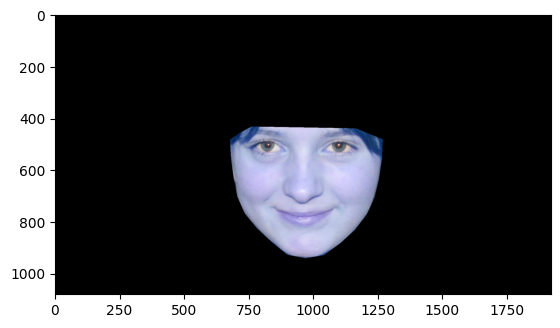

In [26]:
plt.imshow(source_face)

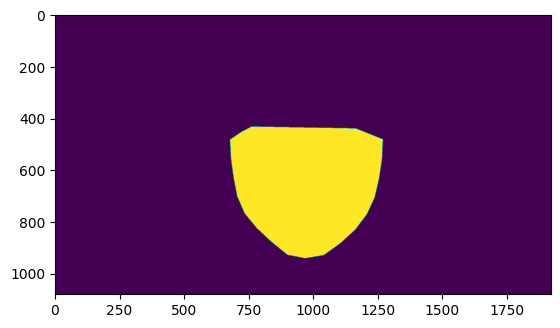

In [27]:
plt.imshow(mask)

In [28]:
rect = cv2.boundingRect(convexhull)
subdiv = cv2.Subdiv2D(rect)
subdiv.insert(points_list)
triangles = subdiv.getTriangleList()
triangles = np.array(triangles, dtype=np.int32)

In [29]:
# for t in triangles:
#     pt1 = (t[0], t[1])
#     pt2 = (t[2], t[3])
#     pt3 = (t[4], t[5])

#     cv2.line(source, pt1, pt2, (0, 0, 255))
#     cv2.line(source, pt2, pt3, (0, 0, 255))
#     cv2.line(source, pt1, pt3, (0, 0, 255))

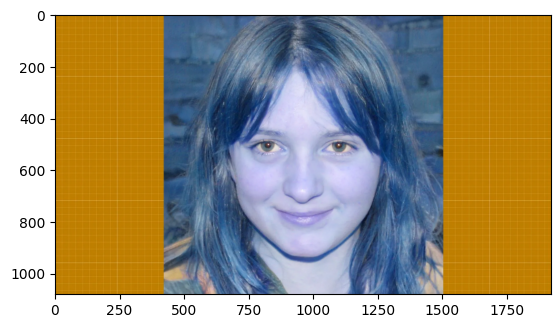

In [30]:
plt.imshow(source)

In [31]:
triangles_id = []

In [32]:
def index_nparray(nparray):
    index = None
    for num in nparray[0]:
        index = num
        break
    return index
for t in triangles:
  pt1 = (t[0], t[1])
  pt2 = (t[2], t[3])
  pt3 = (t[4], t[5])

  id_pt1 = np.where((points == pt1).all(axis=1))
  id_pt1 = index_nparray(id_pt1)
  id_pt2 = np.where((points == pt2).all(axis=1))
  id_pt2 = index_nparray(id_pt2)
  id_pt3 = np.where((points == pt3).all(axis=1))
  id_pt3 = index_nparray(id_pt3)

  if id_pt1 is not None and id_pt2 is not None and id_pt3 is not None:
    triangle = [id_pt1, id_pt2, id_pt3]
    triangles_id.append(triangle)

In [33]:
len(triangles_id)

113

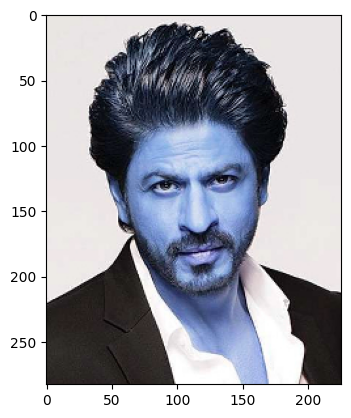

In [34]:
destination = cv2.imread("DestinationImage.jpg")

destination_grey = cv2.cvtColor(destination, cv2.COLOR_BGR2GRAY)

destination_faces= face_detector(destination_grey)
for face in destination_faces:
    points_predict2 = points_detector(destination_grey, face)
    points_list2 = []
    for n in range(0, 68):
        x = points_predict2.part(n).x
        y = points_predict2.part(n).y
        points_list2.append((x, y))
    points2 = np.array(points_list2, np.int32)
    convexhull2 = cv2.convexHull(points2)

plt.imshow(destination)

In [35]:
destination_new_face = np.zeros_like(destination, np.uint8)

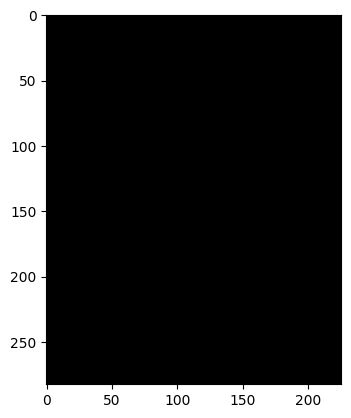

In [36]:
plt.imshow(destination_new_face)